In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("../03-Convolutional-Neural-Networks/MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ../03-Convolutio

In [5]:
tf.reset_default_graph()

In [26]:
# 784
# 392
# 196
# 392
# 784

In [27]:
learning_rate = 0.01

In [14]:
num_inputs = 784
neurons_hid1 = 392
neurons_hid2 = 196
neurons_hid3 = neuron_hid1
num_outputs = num_inputs

In [15]:
actf = tf.nn.relu

In [16]:
X = tf.placeholder(tf.float32,shape=[None,num_inputs])

In [17]:
# New initializer - better weights for initializing autoencoders
initializer = tf.variance_scaling_initializer()

In [18]:
w1 = tf.Variable(initializer([num_inputs,neuron_hid1]),dtype=tf.float32)
w2 = tf.Variable(initializer([neurons_hid1,neuron_hid2]),dtype=tf.float32)
w3 = tf.Variable(initializer([neurons_hid2,neuron_hid3]),dtype=tf.float32)
w4 = tf.Variable(initializer([neurons_hid3,num_outputs]),dtype=tf.float32)

In [20]:
b1 = tf.Variable(tf.zeros(neurons_hid1))
b2 = tf.Variable(tf.zeros(neurons_hid2))
b3 = tf.Variable(tf.zeros(neurons_hid3))
b4 = tf.Variable(tf.zeros(num_outputs))

In [21]:
act_func = tf.nn.relu

In [23]:
hid_layer1 = act_func(tf.matmul(X,w1) + b1)
hid_layer2 = act_func(tf.matmul(hid_layer1, w2) + b2)
hid_layer3 = act_func(tf.matmul(hid_layer2, w3) + b3)
output_layer = act_func(tf.matmul(hid_layer3, w4) + b4)

In [24]:
loss = tf.reduce_mean(tf.square(output_layer - X))

In [34]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [35]:
train = optimizer.minimize(loss)

In [36]:
init = tf.global_variables_initializer()

In [37]:
saver = tf.train.Saver()

# Running Session

In [38]:
num_epochs = 5
batch_size = 150

with tf.Session() as sess:
    
    sess.run(init)
    
    for epoch in range(num_epochs):
        
        num_batches = mnist.train.num_examples // batch_size
        
        for iteration in range(num_batches):
            
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(train, feed_dict = {X:X_batch})
            
        training_loss = loss.eval(feed_dict={X:X_batch})
        
        print("EPOCH: {} LOSS: {}".format(epoch,training_loss))
        
    saver.save(sess,'./example_stacked_autoencoder.ckpt')

EPOCH: 0 LOSS: 0.03507320210337639
EPOCH: 1 LOSS: 0.03501174971461296
EPOCH: 2 LOSS: 0.03360145166516304
EPOCH: 3 LOSS: 0.033717311918735504
EPOCH: 4 LOSS: 0.032741665840148926


In [39]:
num_test_images = 10

with tf.Session() as sess:
    
    saver.restore(sess, './example_stacked_autoencoder.ckpt')
    
    results = output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from ./example_stacked_autoencoder.ckpt


In [42]:
results.shape

(10, 784)

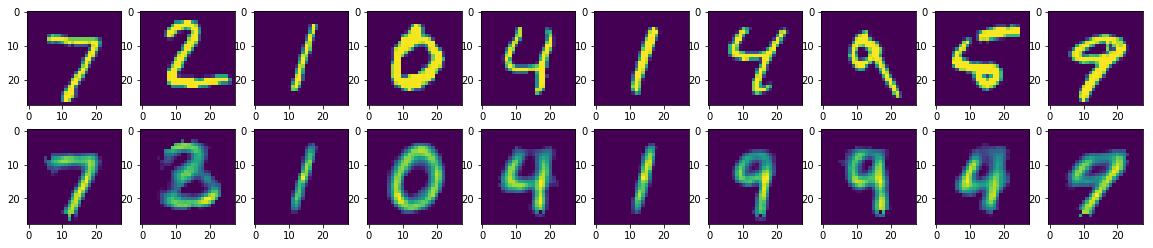

In [45]:
f, a = plt.subplots(2,10, figsize = (20,4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
    a[1][i].imshow(np.reshape(results[i],(28,28)))